In [139]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [140]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [141]:
len(X_train)

60000

In [142]:
len(X_test)

10000

In [143]:
X_train[0].shape

(28, 28)

In [144]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

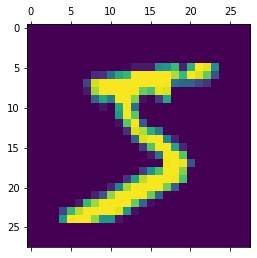

In [145]:
plt.matshow(X_train[0])

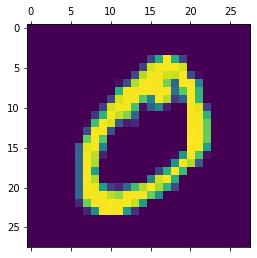

In [146]:
plt.matshow(X_train[1])

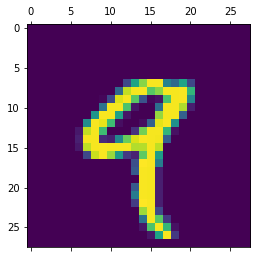

In [147]:
plt.matshow(X_train[4])

In [148]:
y_train[4]

9

In [149]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [150]:
X_train.shape

(60000, 28, 28)

In [151]:
# SCALING
X_train=X_train/255
X_test=X_test/255

In [152]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [153]:
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)

X_train_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [154]:
X_train_flatten.shape

(60000, 784)

In [155]:
X_test_flatten.shape

(10000, 784)

In [156]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [157]:
model=keras.Sequential([
    keras.layers.Dense(10 ,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4665 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 2s 993us/step - loss: 0.3036 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 987us/step - loss: 0.2832 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2668 - accuracy: 0.9251


In [158]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2651 - accuracy: 0.9259


[0.2650938630104065, 0.9258999824523926]

In [159]:
y_predicted=model.predict(X_test_flatten)
y_predicted

array([[3.9472193e-02, 4.7347729e-07, 8.5081249e-02, ..., 9.9977160e-01,
        1.2840790e-01, 7.2545588e-01],
       [5.5049992e-01, 1.1225700e-02, 9.9918544e-01, ..., 6.8354350e-13,
        1.7797291e-01, 3.4928576e-09],
       [4.4867396e-04, 9.9344945e-01, 6.7379862e-01, ..., 1.5375927e-01,
        4.0533891e-01, 3.8648933e-02],
       ...,
       [5.7100642e-06, 5.8495229e-06, 1.4674664e-03, ..., 3.1339920e-01,
        6.2754399e-01, 7.8597128e-01],
       [1.4492869e-04, 2.4393201e-04, 1.6430020e-04, ..., 7.9627476e-05,
        7.8984690e-01, 1.0847704e-04],
       [2.9817462e-02, 7.3153833e-10, 3.2222849e-01, ..., 3.0726525e-08,
        6.5398216e-04, 1.3161859e-06]], dtype=float32)

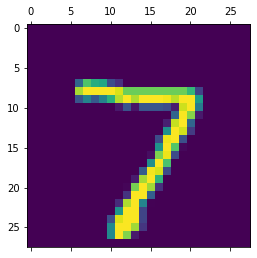

In [162]:
plt.matshow(X_test[0])

In [163]:
y_predicted[0]

array([3.9472193e-02, 4.7347729e-07, 8.5081249e-02, 9.6583247e-01,
       3.7793815e-03, 1.2809065e-01, 3.1425052e-06, 9.9977160e-01,
       1.2840790e-01, 7.2545588e-01], dtype=float32)

In [164]:
np.argmax(y_predicted[0])

7

# y_predicted[1]

In [165]:
np.argmax(y_predicted[1])

2

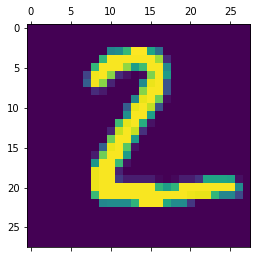

In [166]:
plt.matshow(X_test[1])

In [167]:
y_predicted[1]

array([5.5049992e-01, 1.1225700e-02, 9.9918544e-01, 3.5872960e-01,
       5.2343546e-10, 8.2206059e-01, 8.6229813e-01, 6.8354350e-13,
       1.7797291e-01, 3.4928576e-09], dtype=float32)

In [168]:
np.argmax(y_predicted[1])

2

In [169]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [170]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [171]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,    9,  924,   13,   10,    5,   12,   11,   40,    2],
       [   4,    0,   21,  913,    0,   26,    2,   12,   26,    6],
       [   1,    1,    4,    1,  920,    0,   11,    4,   11,   29],
       [  11,    3,    4,   29,    9,  777,   13,    6,   34,    6],
       [  14,    3,    5,    1,    7,   14,  910,    2,    2,    0],
       [   1,    5,   24,    6,    8,    1,    0,  951,    3,   29],
       [   6,    7,    7,   19,    9,   21,    9,   12,  880,    4],
       [  11,    7,    1,    9,   32,    6,    0,   26,   10,  907]])>

Text(69.0, 0.5, 'Truth')

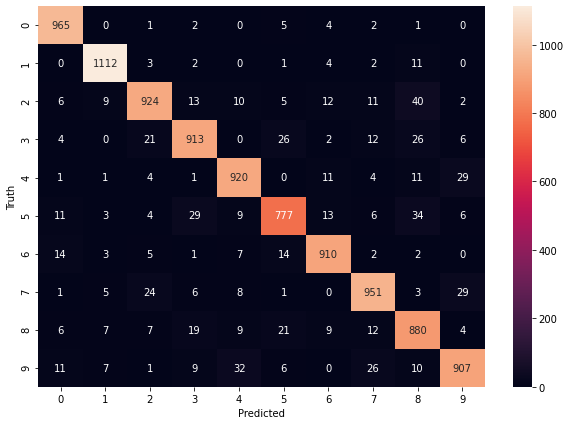

In [172]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

963  time it 0 and model predicted 0


1112 times it was 1 and model predicted 1

43 times it was 2 model predicted 8

In [178]:
model1=keras.Sequential([
    keras.layers.Dense(100 ,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10 ,activation='sigmoid')
])
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model1.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2722 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1270 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0881 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0685 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0541 - accuracy: 0.9828


In [179]:
y_predicted1=model1.predict(X_test_flatten)
y_predicted1

array([[5.1446855e-03, 1.2061596e-03, 7.4418074e-01, ..., 9.9996901e-01,
        1.8168479e-02, 1.2774795e-02],
       [1.3535213e-01, 9.9236232e-01, 9.9999928e-01, ..., 5.5338560e-06,
        9.2969096e-01, 1.2842621e-07],
       [6.5812469e-04, 9.9858016e-01, 1.6077077e-01, ..., 5.3507549e-01,
        2.1591458e-01, 1.7118454e-03],
       ...,
       [2.5653259e-07, 4.5682671e-05, 4.4588862e-07, ..., 3.4369120e-01,
        1.6604614e-01, 8.6608773e-01],
       [7.2109997e-03, 1.1525452e-03, 1.8718839e-04, ..., 2.9107512e-05,
        7.1309674e-01, 2.1858707e-05],
       [1.2448722e-01, 2.7159452e-03, 7.8475618e-01, ..., 4.2924104e-05,
        2.8746128e-03, 1.3061482e-01]], dtype=float32)

In [180]:
model1.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0839 - accuracy: 0.9738


[0.08394584059715271, 0.973800003528595]

[7, 2, 1, 0, 4]


Text(69.0, 0.5, 'Truth')

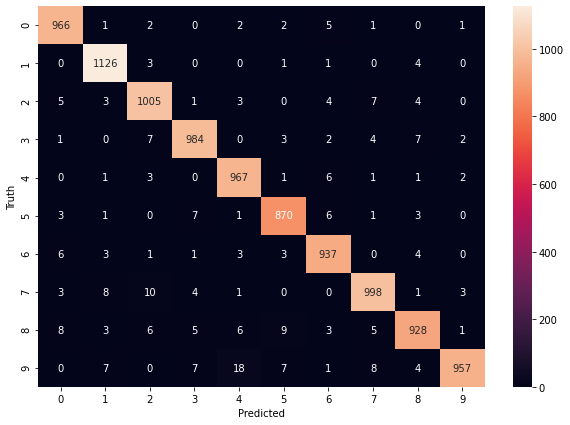

In [181]:
y_predicted_labels1=[np.argmax(i) for i in y_predicted1]
print(y_predicted_labels1[:5])

cm1=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels1)

plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



In [188]:
model2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#we are using without flatten
    keras.layers.Dense(100 ,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10 ,activation='sigmoid')
])
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2776 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1265 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0897 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0674 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0547 - accuracy: 0.9835


In [189]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0795 - accuracy: 0.9762


[0.07950212061405182, 0.9761999845504761]

In [190]:
y_predicted2=model.predict(X_test_flatten)
y_predicted2

array([[8.0204606e-03, 3.9443374e-04, 4.3685094e-01, ..., 9.9988699e-01,
        9.1158926e-02, 8.0442476e-01],
       [1.8141091e-02, 9.9697280e-01, 9.9999952e-01, ..., 1.8472900e-08,
        8.4507579e-01, 1.1738217e-06],
       [9.7498298e-04, 9.9971485e-01, 1.3014665e-01, ..., 5.8553523e-01,
        1.5264681e-01, 5.5753887e-03],
       ...,
       [1.2278140e-06, 4.9952214e-05, 1.0756719e-06, ..., 5.9779918e-01,
        8.7600362e-01, 9.9506783e-01],
       [1.5475929e-02, 4.2749941e-03, 1.1196275e-04, ..., 1.6277432e-03,
        9.8962331e-01, 1.6532242e-03],
       [7.6238787e-01, 1.2111833e-04, 2.3033297e-01, ..., 3.1109113e-05,
        1.0352552e-02, 1.5680194e-02]], dtype=float32)

In [191]:
y_predicted_labels2=[np.argmax(i) for i in y_predicted2]
y_predicted_labels2[:5]

[7, 2, 1, 0, 4]

In [193]:
# building confusion matrix
cm2=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    1,    0,    2,    3,    0,    2,    2],
       [   0, 1126,    1,    1,    0,    2,    2,    0,    3,    0],
       [   6,    2, 1001,    4,    2,    0,    2,    5,   10,    0],
       [   0,    1,    2,  990,    0,    2,    0,    1,    5,    9],
       [   0,    0,    5,    1,  945,    0,    2,    1,    2,   26],
       [   2,    0,    0,   16,    1,  858,    2,    0,   10,    3],
       [   8,    3,    2,    1,    2,    4,  934,    0,    4,    0],
       [   2,    9,    8,    4,    1,    0,    0,  976,    6,   22],
       [   3,    0,    1,    4,    3,    3,    2,    3,  951,    4],
       [   3,    4,    0,    4,    6,    2,    0,    2,    4,  984]])>

[7, 2, 1, 0, 4]


Text(69.0, 0.5, 'Truth')

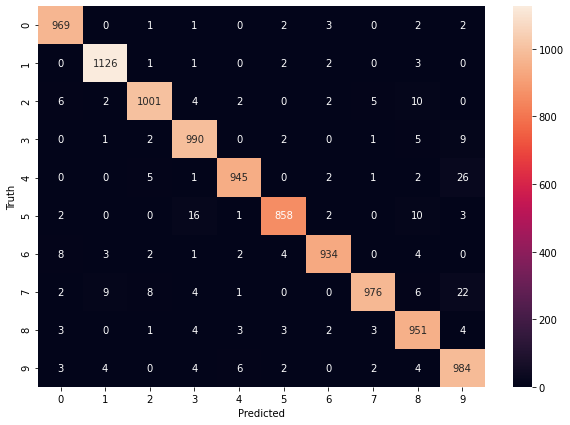

In [194]:
y_predicted_labels2=[np.argmax(i) for i in y_predicted2]
print(y_predicted_labels2[:5])

cm2=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels2)

plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')